# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observations:

Looking at the Latitude vs Temperature Plot, the temperature increases as the latitude approaches the equator. The northern hemisphere cities tend to be cooler as latitudes increase. There seem to be little to no correlation between the latitude vs humidity, latitude vs cloudiness, or latitude vs wind speeds.

For both northern and southern hemisphere, there are a strong correlation between the city latitude vs max temperature. The Linear regression model for the northern hemisphere plot has a r-value of -0.861 and 0.785 for the southern hemisphere. 

The linear regression model for the other attributes in both hemispheres: humidity, cloudiness, and windspeed have low r-values. The highest r-value of 0.281 for the humidity in northern half and lowest being 0.072 for the wind speed in the northern half as well. The regression models support the previous observations of low correlation between the latitude vs humidity, latitude vs cloudiness, or latitude vs wind speeds.


In [174]:
pip install citipy

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

['ponta do sol', 'ushuaia', 'klaksvik', 'new norfolk', 'chokurdakh', 'castro', 'codrington', 'deogarh', 'kavaratti', 'zonalnoye', 'jalu', 'barrow', 'acapulco', 'illoqqortoormiut', 'whitehorse', 'mataura', 'lobo', 'hobart', 'jamestown', 'arraial do cabo', 'vetlanda', 'kamenskoye', 'katsuura', 'celestun', 'victoria', 'rikitea', 'constitucion', 'toliary', 'souillac', 'te anau', 'lardos', 'hilo', 'albany', 'san patricio', 'meulaboh', 'bluff', 'lavrentiya', 'airai', 'lerwick', 'punta arenas', 'half moon bay', 'sitka', 'pamekasan', 'kaitangata', 'saskylakh', 'neuquen', 'east london', 'baiyin', 'vaini', 'aguimes', 'avarua', 'bredasdorp', 'busselton', 'caravelas', 'rincon', 'yellowknife', 'vilkaviskis', 'kodiak', 'kokologo', 'los llanos de aridane', 'mbala', 'malwan', 'srednekolymsk', 'lebu', 'nizhneyansk', 'paamiut', 'pinar del rio', 'nuuk', 'ribeira grande', 'qaanaaq', 'cape town', 'solnechnyy', 'lahad datu', 'boguchany', 'butaritari', 'pathardi', 'hit', 'cidreira', 'amderma', 'bontang', 'bo

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Build query URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# empty lists for appending
city_data =[]
lat = []
long =[]
temp = []
hum=[]
cloud=[]
windspeed=[]
country =[]
dates=[]

#set counters
record_count = 1
set_count = 1


print("Beginning Data Retrieval")
print("-----------------------------")

#for loop

for city in cities:
    
    print(f'Processing Record {record_count} of set {set_count} |{city}')
    
    try:
        weather_response = requests.get(query_url + city).json()
        
        if record_count > 49:
            record_count = 1
            set_count += 1
        
        else:
            record_count +=1
         #print response  
#         print(json.dumps(weather_response, indent=4, sort_keys=True))
        
        #latitude
        lat.append(weather_response['coord']['lat'])
        # longitude
        long.append(weather_response['coord']['lon'])
        # temp
        temp.append(weather_response['main']['temp_max'])
        # humidity
        hum.append(weather_response['main']['humidity'])
        # cloudiness
        cloud.append(weather_response['clouds']['all'])
        #wind speed (mph)
        windspeed.append(weather_response['wind']['speed'])
        # country
        country.append(weather_response['sys']['country'])
        #date
        dates.append(weather_response['dt'])
        # city
        city_data.append(city)
        
    except:
        print("City not found. Skipping...")
print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 |ponta do sol
Processing Record 2 of set 1 |ushuaia
Processing Record 3 of set 1 |klaksvik
Processing Record 4 of set 1 |new norfolk
Processing Record 5 of set 1 |chokurdakh
Processing Record 6 of set 1 |castro
Processing Record 7 of set 1 |codrington
Processing Record 8 of set 1 |deogarh
Processing Record 9 of set 1 |kavaratti
Processing Record 10 of set 1 |zonalnoye
City not found. Skipping...
Processing Record 11 of set 1 |jalu
Processing Record 12 of set 1 |barrow
Processing Record 13 of set 1 |acapulco
Processing Record 14 of set 1 |illoqqortoormiut
City not found. Skipping...
Processing Record 15 of set 1 |whitehorse
Processing Record 16 of set 1 |mataura
Processing Record 17 of set 1 |lobo
Processing Record 18 of set 1 |hobart
Processing Record 19 of set 1 |jamestown
Processing Record 20 of set 1 |arraial do cabo
Processing Record 21 of set 1 |vetlanda
Processing Record 22 of set 1 |kamenskoye
Ci

Processing Record 41 of set 4 |haibowan
City not found. Skipping...
Processing Record 42 of set 4 |barra do garcas
Processing Record 43 of set 4 |arona
Processing Record 44 of set 4 |matara
Processing Record 45 of set 4 |mys shmidta
City not found. Skipping...
Processing Record 46 of set 4 |hami
Processing Record 47 of set 4 |port hedland
Processing Record 48 of set 4 |yarada
Processing Record 49 of set 4 |bandarbeyla
Processing Record 50 of set 4 |yerbogachen
Processing Record 1 of set 5 |tsihombe
City not found. Skipping...
Processing Record 2 of set 5 |kruisfontein
Processing Record 3 of set 5 |viedma
Processing Record 4 of set 5 |shar
Processing Record 5 of set 5 |kilindoni
Processing Record 6 of set 5 |gold coast
Processing Record 7 of set 5 |severo-kurilsk
Processing Record 8 of set 5 |khatanga
Processing Record 9 of set 5 |cap-haitien
Processing Record 10 of set 5 |lazaro cardenas
Processing Record 11 of set 5 |sterling
Processing Record 12 of set 5 |costinesti
Processing Record

Processing Record 32 of set 8 |sechura
Processing Record 33 of set 8 |bairiki
Processing Record 34 of set 8 |mogadishu
Processing Record 35 of set 8 |basco
Processing Record 36 of set 8 |marsaxlokk
Processing Record 37 of set 8 |mehamn
Processing Record 38 of set 8 |swan hill
Processing Record 39 of set 8 |homer
Processing Record 40 of set 8 |nanortalik
Processing Record 41 of set 8 |vokhma
Processing Record 42 of set 8 |igarka
Processing Record 43 of set 8 |tagusao
Processing Record 44 of set 8 |yeppoon
Processing Record 45 of set 8 |kedrovyy
Processing Record 46 of set 8 |nanning
Processing Record 47 of set 8 |ossora
Processing Record 48 of set 8 |gao
Processing Record 49 of set 8 |jardim
Processing Record 50 of set 8 |garoua
Processing Record 1 of set 9 |lakatoro
Processing Record 2 of set 9 |manali
Processing Record 3 of set 9 |hanko
Processing Record 4 of set 9 |paita
Processing Record 5 of set 9 |tarko-sale
Processing Record 6 of set 9 |santa isabel do rio negro
Processing Record

Processing Record 21 of set 12 |pathein
Processing Record 22 of set 12 |shetpe
Processing Record 23 of set 12 |usevya
Processing Record 24 of set 12 |stockbridge
Processing Record 25 of set 12 |tupik
Processing Record 26 of set 12 |ordu
Processing Record 27 of set 12 |puerto narino
Processing Record 28 of set 12 |sarh
Processing Record 29 of set 12 |padang
Processing Record 30 of set 12 |aden
Processing Record 31 of set 12 |umm lajj
Processing Record 32 of set 12 |khandbari
Processing Record 33 of set 12 |henderson
Processing Record 34 of set 12 |bronnoysund
Processing Record 35 of set 12 |rockport
Processing Record 36 of set 12 |buchanan
Processing Record 37 of set 12 |shizuishan
Processing Record 38 of set 12 |bilma
Processing Record 39 of set 12 |ketchikan
Processing Record 40 of set 12 |sokoni
Processing Record 41 of set 12 |vanimo
Processing Record 42 of set 12 |kununurra
Processing Record 43 of set 12 |chiredzi
Processing Record 44 of set 12 |riohacha
Processing Record 45 of set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [55]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_data,
    "Lat":lat,
    "Lng":long,
    "Max Temp":temp,
    "Humidity":hum,
    "Cloudiness":cloud,
    "Wind Speed":windspeed,
    "Country":country,
    "Date":dates,
    }

# establish dataframe
weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ponta do sol,32.6667,-17.1000,65.12,82,16,10.96,PT,1650914158
1,ushuaia,-54.8000,-68.3000,42.42,72,100,3.65,AR,1650913973
2,klaksvik,62.2266,-6.5890,40.12,81,100,15.37,FO,1650914381
3,new norfolk,-42.7826,147.0587,50.88,86,91,2.13,AU,1650914162
4,chokurdakh,70.6333,147.9167,6.13,92,100,5.46,RU,1650914165
...,...,...,...,...,...,...,...,...,...
556,lae,-6.7221,146.9847,75.18,84,70,6.33,PG,1650914553
557,gobabis,-22.4500,18.9667,66.96,39,58,11.30,NA,1650914554
558,vanavara,60.3400,102.2797,28.35,97,100,4.36,RU,1650914338
559,roma,43.2128,-75.4557,76.37,35,20,17.27,US,1650914554


In [142]:
#export df

exp_path = weather_df.to_csv("../output_data/export_weather_df.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [143]:
# determine cities with > 100% humidity
hi_hum = weather_df[weather_df["Humidity"]>100]
max_hum = weather_df["Humidity"].max()
max_hum

100

In [144]:
#  Get the indices of cities that have humidity over 100%.


In [145]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [146]:
#converting date to readable format 
date_df = pd.to_datetime(weather_df["Date"], unit ='s')
date_df

0     2022-04-25 19:15:58
1     2022-04-25 19:12:53
2     2022-04-25 19:19:41
3     2022-04-25 19:16:02
4     2022-04-25 19:16:05
              ...        
556   2022-04-25 19:22:33
557   2022-04-25 19:22:34
558   2022-04-25 19:18:58
559   2022-04-25 19:22:34
560   2022-04-25 19:22:34
Name: Date, Length: 561, dtype: datetime64[ns]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

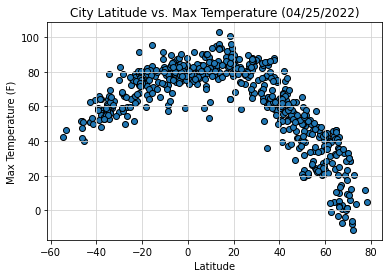

In [147]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (04/25/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-", color="lightgrey")
plt.savefig("../output_data/Latitude vs. Temperature Plot.png")
plt.show()

## Latitude vs. Humidity Plot

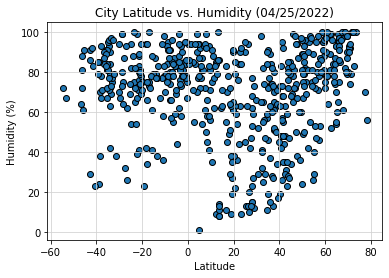

In [148]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolor = "black")
plt.title("City Latitude vs. Humidity (04/25/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/Latitude vs. Humidity Plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

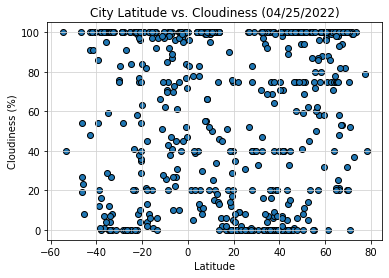

In [149]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (04/25/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/Latitude vs. Cloudiness Plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

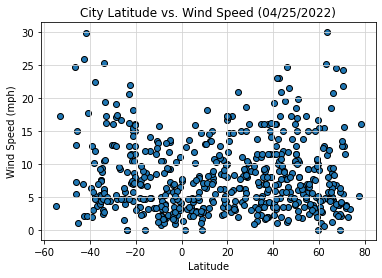

In [150]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (04/25/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/Latitude vs. Wind Speed Plot.png")
plt.show()

## Linear Regression

In [151]:
# create data frame for northern hemisphere cities 
north_hem = weather_df[weather_df["Lat"]>0]
north_hem

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ponta do sol,32.6667,-17.1000,65.12,82,16,10.96,PT,1650914158
2,klaksvik,62.2266,-6.5890,40.12,81,100,15.37,FO,1650914381
4,chokurdakh,70.6333,147.9167,6.13,92,100,5.46,RU,1650914165
7,deogarh,21.5333,84.7333,79.83,36,0,2.77,IN,1650914420
8,kavaratti,10.5669,72.6420,84.70,75,50,6.29,IN,1650913869
...,...,...,...,...,...,...,...,...,...
552,ardakan,32.3100,54.0175,76.17,32,100,8.81,IR,1650914475
553,pachperwa,27.5167,82.6500,82.67,13,0,4.85,IN,1650914553
558,vanavara,60.3400,102.2797,28.35,97,100,4.36,RU,1650914338
559,roma,43.2128,-75.4557,76.37,35,20,17.27,US,1650914554


In [152]:
# dataframe for southern hemisphere cities 
south_hem = weather_df[weather_df["Lat"]<0]
south_hem

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,ushuaia,-54.8000,-68.3000,42.42,72,100,3.65,AR,1650913973
3,new norfolk,-42.7826,147.0587,50.88,86,91,2.13,AU,1650914162
5,castro,-24.7911,-50.0119,76.62,54,0,3.96,BR,1650914252
6,codrington,-38.2667,141.9667,58.71,70,100,10.07,AU,1650914156
13,mataura,-46.1927,168.8643,51.48,81,54,7.20,NZ,1650914153
...,...,...,...,...,...,...,...,...,...
550,walvis bay,-22.9575,14.5053,61.75,72,0,4.61,NA,1650914313
554,imbituba,-28.2400,-48.6703,78.85,64,54,17.38,BR,1650914553
555,alyangula,-13.8483,136.4192,81.19,77,92,4.81,AU,1650914310
556,lae,-6.7221,146.9847,75.18,84,70,6.33,PG,1650914553


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7413574208270295


<function matplotlib.pyplot.show(close=None, block=None)>

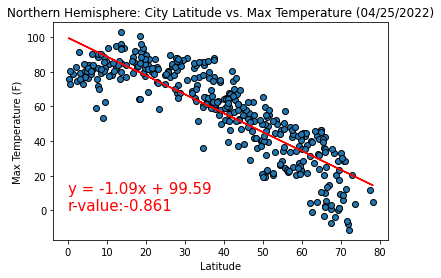

In [163]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"],north_hem["Max Temp"])
regress_values = north_hem["Lat"] * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(north_hem["Lat"],north_hem["Max Temp"], edgecolor = "black")

# draw our regression line
plt.plot(north_hem["Lat"],regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(0,0), fontsize = 15, color = "red")
#labeling 
plt.title("Northern Hemisphere: City Latitude vs. Max Temperature (04/25/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../output_data/Northern Hemisphere City Latitude vs. Max Temperature Plot.png")
print(f"The r-squared is: {rvalue**2}")
plt.show

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.616425415562884


<function matplotlib.pyplot.show(close=None, block=None)>

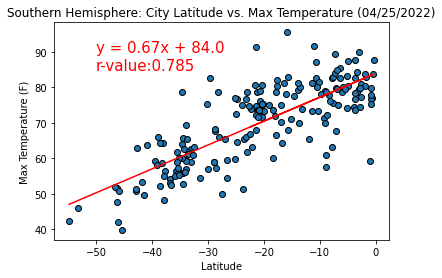

In [172]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Lat"],south_hem["Max Temp"])
regress_values = south_hem["Lat"] * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(south_hem["Lat"],south_hem["Max Temp"],edgecolor = "black")

# draw our regression line
plt.plot(south_hem["Lat"],regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(-50,85), fontsize = 15, color = "red")
#labeling 
plt.title("Southern Hemisphere: City Latitude vs. Max Temperature (04/25/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../output_data/Southern Hemisphere City Latitude vs. Max Temperature Plot.png")
print(f"The r-squared is: {rvalue**2}")
plt.show

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07908970006357685


<function matplotlib.pyplot.show(close=None, block=None)>

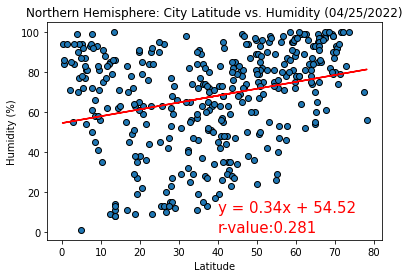

In [165]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"],north_hem["Humidity"])
regress_values = north_hem["Lat"] * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(north_hem["Lat"],north_hem["Humidity"], edgecolor = "black")

# draw our regression line
plt.plot(north_hem["Lat"],regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(40,0), fontsize = 15, color = "red")
#labeling 
plt.title("Northern Hemisphere: City Latitude vs. Humidity (04/25/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../output_data/Northern Hemisphere City Latitude vs. Humidity Plot.png")
print(f"The r-squared is: {rvalue**2}")
plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.007322376825048267


<function matplotlib.pyplot.show(close=None, block=None)>

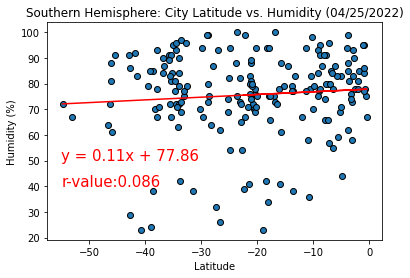

In [166]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Lat"],south_hem["Humidity"])
regress_values = south_hem["Lat"] * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(south_hem["Lat"],south_hem["Humidity"], edgecolor = "black")

# draw our regression line
plt.plot(south_hem["Lat"],regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(-55,40), fontsize = 15, color = "red")
#labeling 
plt.title("Southern Hemisphere: City Latitude vs. Humidity (04/25/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../output_data/Southern Hemisphere City Latitude vs. Humidity Plot.png")
print(f"The r-squared is: {rvalue**2}")
plt.show

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06949706000290014


<function matplotlib.pyplot.show(close=None, block=None)>

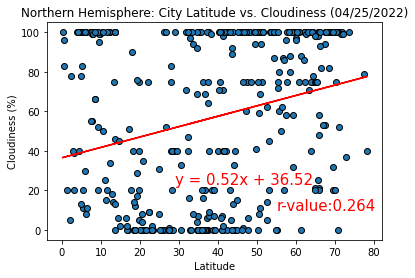

In [167]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"],north_hem["Cloudiness"])
regress_values = north_hem["Lat"] * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(north_hem["Lat"],north_hem["Cloudiness"], edgecolor = "black")

# draw our regression line
plt.plot(north_hem["Lat"],regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(29,23),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(55,10), fontsize = 15, color = "red")
#labeling 
plt.title("Northern Hemisphere: City Latitude vs. Cloudiness (04/25/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../output_data/Northern Hemisphere City Latitude vs. Cloudiness Plot.png")
print(f"The r-squared is: {rvalue**2}")
plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02523632394671698


<function matplotlib.pyplot.show(close=None, block=None)>

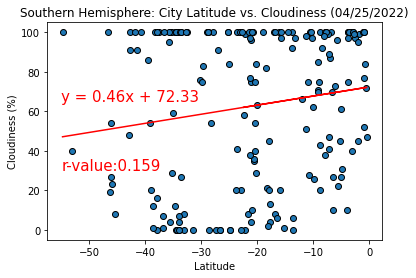

In [168]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Lat"],south_hem["Cloudiness"])
regress_values = south_hem["Lat"] * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(south_hem["Lat"],south_hem["Cloudiness"], edgecolor = "black")

# draw our regression line
plt.plot(south_hem["Lat"],regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(-55,65),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(-55,30), fontsize = 15, color = "red")
#labeling 
plt.title("Southern Hemisphere: City Latitude vs. Cloudiness (04/25/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../output_data/Southern Hemisphere City Latitude vs. Cloudiness Plot.png")
print(f"The r-squared is: {rvalue**2}")
plt.show

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005120688313105701


<function matplotlib.pyplot.show(close=None, block=None)>

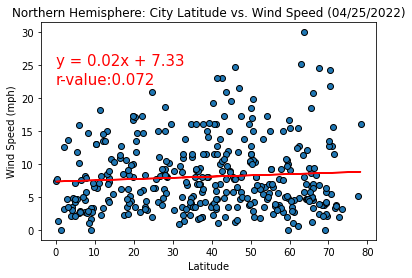

In [169]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"],north_hem["Wind Speed"])
regress_values = north_hem["Lat"] * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(north_hem["Lat"],north_hem["Wind Speed"], edgecolor = "black")

# draw our regression line
plt.plot(north_hem["Lat"],regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(0,22), fontsize = 15, color = "red")
#labeling 
plt.title("Northern Hemisphere: City Latitude vs. Wind Speed (04/25/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/Northern Hemisphere City Latitude vs. Wind Speed Plot.png")
print(f"The r-squared is: {rvalue**2}")
plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07699040220386172


<function matplotlib.pyplot.show(close=None, block=None)>

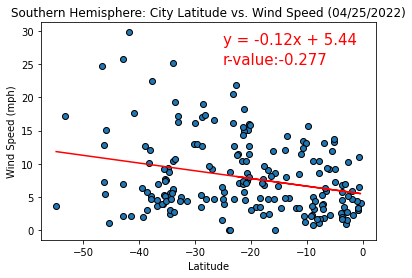

In [170]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Lat"],south_hem["Wind Speed"])
regress_values = south_hem["Lat"] * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(south_hem["Lat"],south_hem["Wind Speed"], edgecolor = "black")

# draw our regression line
plt.plot(south_hem["Lat"],regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(-25,28),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(-25,25), fontsize = 15, color = "red")
#labeling 
plt.title("Southern Hemisphere: City Latitude vs. Wind Speed (04/25/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/Southern Hemisphere City Latitude vs. Wind Speed Plot.png")
print(f"The r-squared is: {rvalue**2}")
plt.show